In [1]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [2]:
# Where is the majoirty of crime occuring?
# What is the most frequent category of offence? 
# Is there a trend in category of offence over time? (time series analysis)

params = {
    'lat': 50.805832,  # Latitude of Portsmouth
    'lng': -1.087222,   # Longitude of Portsmouth  
    'date': '2023-10'
}

response = requests.get("https://data.police.uk/api/crimes-street/all-crime", params=params)
print(response)

<Response [200]>


In [3]:
crime_json = response.json()
df = pd.DataFrame(crime_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.drop(labels=['context', 'persistent_id', 'location_subtype'], axis=1, inplace=True)
df.head()

,category,location_type,location,outcome_status,id,month
0,anti-social-behaviour,Force,"{'latitude': '50.813457', 'street': {'id': 1554834, 'name': 'On or near Kingston Crescent'}, 'longitude': '-1.082842'}",None,113989145,2023-10
1,anti-social-behaviour,Force,"{'latitude': '50.800385', 'street': {'id': 1554273, 'name': 'On or near Kingswell Street'}, 'longitude': '-1.091286'}",None,113962647,2023-10
2,anti-social-behaviour,Force,"{'latitude': '50.799193', 'street': {'id': 1554345, 'name': 'On or near Surrey Street'}, 'longitude': '-1.090585'}",None,113986839,2023-10
3,anti-social-behaviour,Force,"{'latitude': '50.800380', 'street': {'id': 1554290, 'name': 'On or near Spring Street'}, 'longitude': '-1.091811'}",None,113951312,2023-10
4,anti-social-behaviour,Force,"{'latitude': '50.796334', 'street': {'id': 1554204, 'name': 'On or near Guildhall Walk'}, 'longitude': '-1.093081'}",None,113987239,2023-10


In [4]:
for row in df:
    print(f"{row}: " + str(df[row].isnull().sum()))

category: 0
location_type: 0
location: 0
outcome_status: 98
id: 0
month: 0


In [5]:
df['id'].duplicated().sum()

0

In [6]:
df['month'].value_counts()

2023-10    1018
Name: month, dtype: int64

In [7]:
df.dtypes
df['month'] = pd.to_datetime(df['month'])
df.dtypes

category                  object
location_type             object
location                  object
outcome_status            object
id                         int64
month             datetime64[ns]
dtype: object

In [8]:
outcome_status = []
for row in df['outcome_status']:
    if row is not None:
        outcome_status.append(row['category'])
    else:
        outcome_status.append('None')

df['outcome_status'] = outcome_status
df.sample(10)

,category,location_type,location,outcome_status,id,month
130,burglary,Force,"{'latitude': '50.796451', 'street': {'id': 1554063, 'name': 'On or near White Swan Road'}, 'longitude': '-1.094214'}",Status update unavailable,113947714,2023-10-01
163,criminal-damage-arson,Force,"{'latitude': '50.801709', 'street': {'id': 1554583, 'name': 'On or near St Faiths Road'}, 'longitude': '-1.085839'}",Investigation complete; no suspect identified,113987114,2023-10-01
898,violent-crime,Force,"{'latitude': '50.794035', 'street': {'id': 1554671, 'name': 'On or near Sun Terrace'}, 'longitude': '-1.085393'}",Unable to prosecute suspect,113963832,2023-10-01
897,violent-crime,Force,"{'latitude': '50.806055', 'street': {'id': 1555411, 'name': 'On or near Shearer Road'}, 'longitude': '-1.072485'}",Unable to prosecute suspect,113980976,2023-10-01
967,violent-crime,Force,"{'latitude': '50.795643', 'street': {'id': 1554468, 'name': 'On or near Plymouth Street'}, 'longitude': '-1.087447'}",Local resolution,113953081,2023-10-01
108,bicycle-theft,Force,"{'latitude': '50.800326', 'street': {'id': 1554439, 'name': 'On or near Shopping Area'}, 'longitude': '-1.088392'}",Investigation complete; no suspect identified,113952581,2023-10-01
680,violent-crime,Force,"{'latitude': '50.797944', 'street': {'id': 1553756, 'name': 'On or near Supermarket'}, 'longitude': '-1.105906'}",Status update unavailable,113972943,2023-10-01
71,anti-social-behaviour,Force,"{'latitude': '50.792509', 'street': {'id': 1554048, 'name': 'On or near Landport Terrace'}, 'longitude': '-1.096163'}",None,113977169,2023-10-01
285,other-theft,Force,"{'latitude': '50.795982', 'street': {'id': 1554646, 'name': 'On or near Tyseley Road'}, 'longitude': '-1.086008'}",Unable to prosecute suspect,113974650,2023-10-01
708,violent-crime,Force,"{'latitude': '50.801624', 'street': {'id': 1553862, 'name': 'On or near Cumberland Street'}, 'longitude': '-1.101493'}",Action to be taken by another organisation,113979058,2023-10-01


In [9]:
location = []
for row in df['location']:
    crime_loc = row['street']['name']
    crime_loc = crime_loc.replace('On or near', '')
    location.append(crime_loc)

df['location'] = location
df.sample(10)

,category,location_type,location,outcome_status,id,month
267,other-theft,Force,Trafalgar Place,Status update unavailable,113986937,2023-10-01
232,drugs,Force,St Michael's Road,Local resolution,113949156,2023-10-01
564,vehicle-crime,Force,St Andrews Road,Unable to prosecute suspect,113980991,2023-10-01
281,other-theft,Force,Supermarket,Unable to prosecute suspect,113969704,2023-10-01
640,violent-crime,Force,Guildhall Walk,Status update unavailable,113988853,2023-10-01
500,shoplifting,Force,Supermarket,Investigation complete; no suspect identified,113981900,2023-10-01
883,violent-crime,Force,Westminster Place,Unable to prosecute suspect,113977702,2023-10-01
468,shoplifting,Force,Petrol Station,Unable to prosecute suspect,113973034,2023-10-01
959,violent-crime,Force,Stamshaw Road,Status update unavailable,113985338,2023-10-01
80,anti-social-behaviour,Force,St James's Street,None,113984717,2023-10-01


([0, 1, 2, 3, 4],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'anti-social-behaviour'),
  Text(2, 0, 'public-order'),
  Text(3, 0, 'shoplifting'),
  Text(4, 0, 'vehicle-crime')])

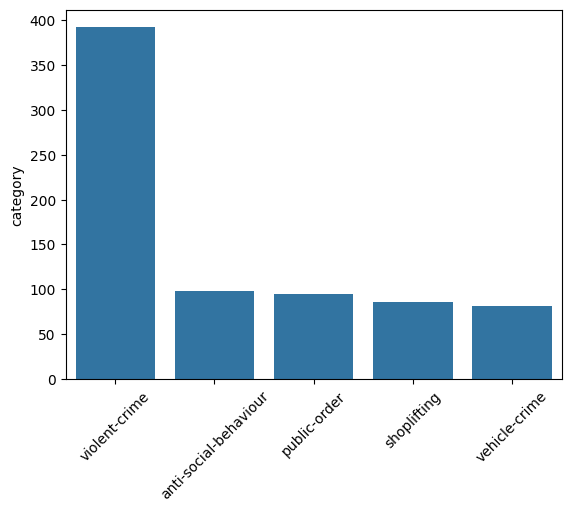

In [10]:
top_5_crime = df['category'].value_counts()[:5]
sns.barplot(top_5_crime, )
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, ' Guildhall Walk'),
  Text(3, 0, ' Shopping Area'),
  Text(4, 0, ' Further/higher Educational Building')])

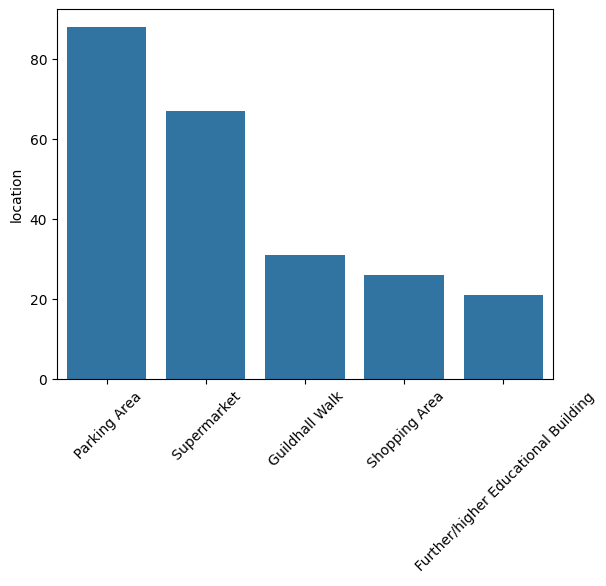

In [11]:
top_5_loc = df['location'].value_counts()[:5]
sns.barplot(top_5_loc)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Force'), Text(1, 0, 'BTP')])

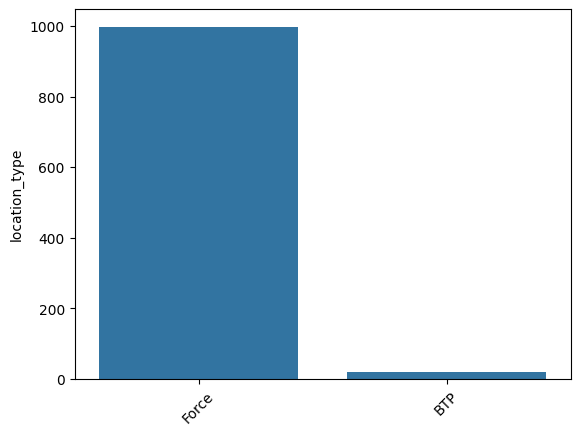

In [12]:
loc_type = df['location_type'].value_counts()
sns.barplot(loc_type)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Investigation complete; no suspect identified'),
  Text(1, 0, 'Unable to prosecute suspect'),
  Text(2, 0, 'Status update unavailable'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Local resolution')])

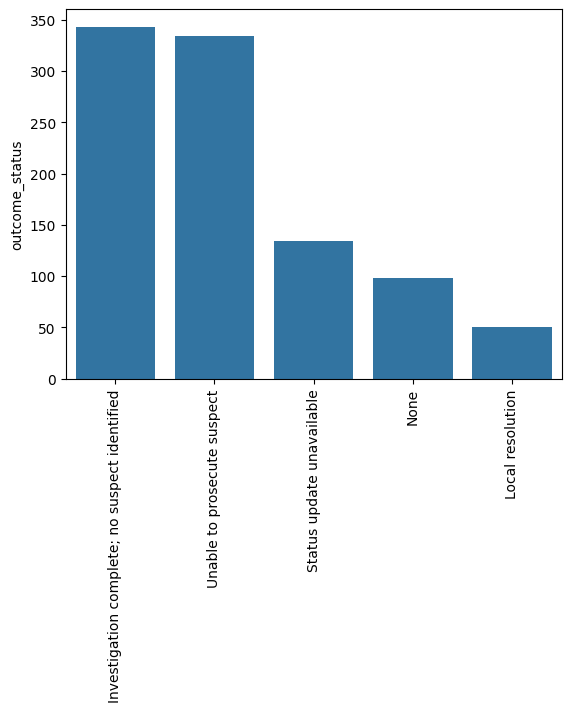

In [13]:
status = df['outcome_status'].value_counts()[:5]
sns.barplot(status)
plt.xticks(rotation=90)

In [14]:
df.shape


(1018, 6)

In [15]:
df.to_csv("Crimes_Port_2023_10", index=False)